In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/tips.csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


<Figure size 1500x1000 with 0 Axes>

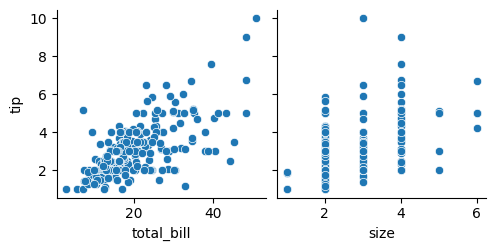

In [5]:
# 1. Scatter Plots
sns.pairplot(data, x_vars=['total_bill', 'size'], y_vars='tip', kind='scatter')
plt.show()

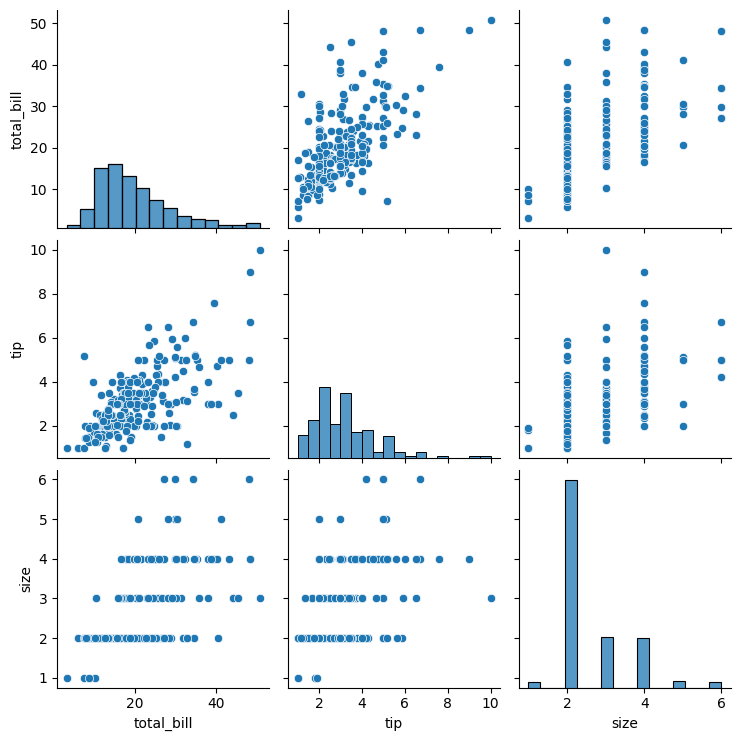

In [6]:
# 2. Pair Plot for Multiple Features
sns.pairplot(data)
plt.show()

In [74]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


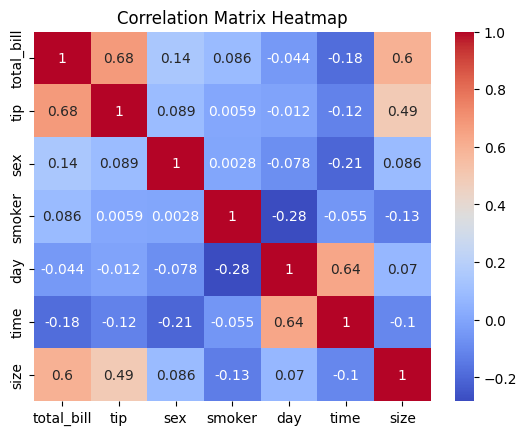

In [11]:
# 3. Correlation Matrix Heatmap
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
# 4. Statistical Tests for Linearity (e.g., Pearson Correlation)
from scipy.stats import linregress
correlation_coefficient, p_value = linregress(data['total_bill'], data['tip'])[:2]
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.1050245173843534
P-value: 0.9202696135546726


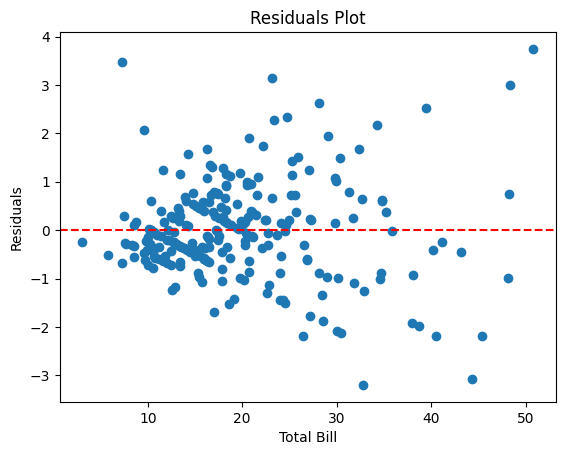

In [16]:
# 5. Residuals Plot
slope, intercept, r_value, p_value, std_err = linregress(data['total_bill'], data['tip'])
predicted_values = slope * data['total_bill'] + intercept

# Residuals
residuals = data['tip'] - predicted_values

# Residuals plot
plt.scatter(data['total_bill'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Total Bill')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = data.drop('tip', axis=1)
y = data['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

print("Linear Regression:")
print(f"  Mean Squared Error: {lr_mse:.2f}")
print(f"  R-squared: {lr_r2:.2f}")
print("\nRidge Regression:")
print(f"  Mean Squared Error: {ridge_mse:.2f}")
print(f"  R-squared: {ridge_r2:.2f}")
print("\nLasso Regression:")
print(f"  Mean Squared Error: {lasso_mse:.2f}")
print(f"  R-squared: {lasso_r2:.2f}")

# Feature importance (example using Lasso coefficients)
feature_importance = pd.Series(lasso_model.coef_, index=X.columns)
print("\nFeature Importance (Lasso):")
feature_importance

Linear Regression:
  Mean Squared Error: 0.69
  R-squared: 0.44

Ridge Regression:
  Mean Squared Error: 0.69
  R-squared: 0.44

Lasso Regression:
  Mean Squared Error: 0.61
  R-squared: 0.51

Feature Importance (Lasso):


,0
total_bill,0.731174
sex,0.000000
smoker,-0.000000
day,0.000000
time,-0.000000
size,0.184788



Decision Tree Regression:
  Mean Squared Error: 0.63
  R-squared: 0.49

Feature Importance (Decision Tree):
total_bill    1.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64


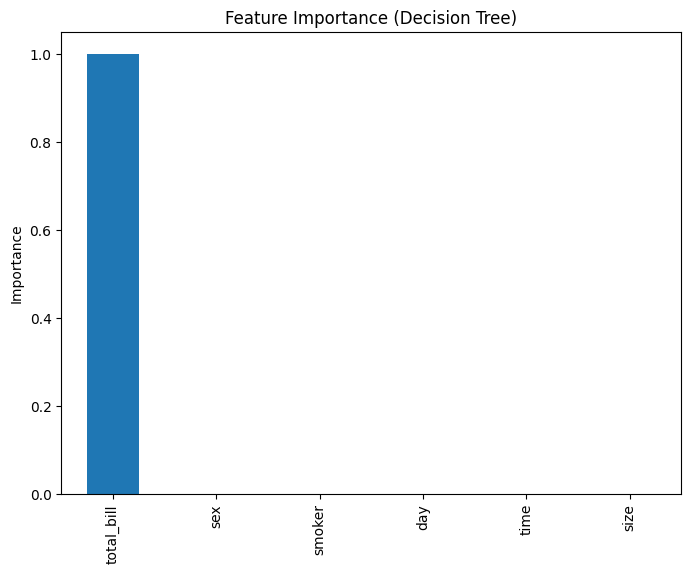

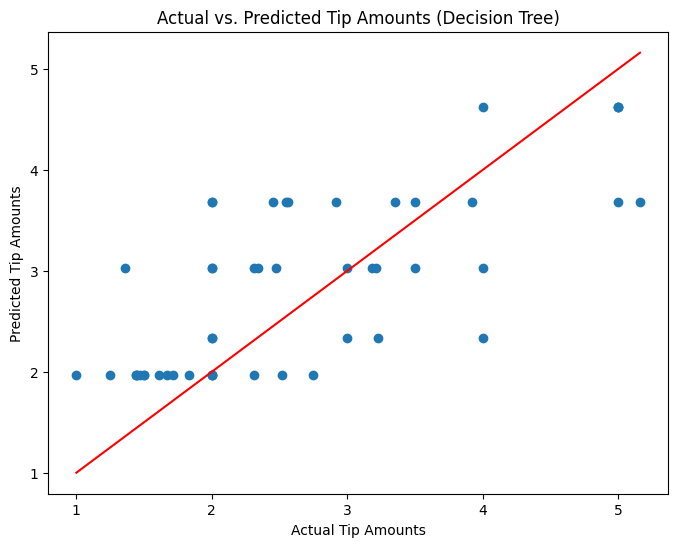

In [60]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42,max_depth=10,min_samples_leaf=30)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print("\nDecision Tree Regression:")
print(f"  Mean Squared Error: {dt_mse:.2f}")
print(f"  R-squared: {dt_r2:.2f}")

# Feature Importance (Decision Tree)
feature_importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns)
print("\nFeature Importance (Decision Tree):")
print(feature_importance_dt)

# Analyze feature importance to identify significant factors

#1. Feature importance plot for decision tree
plt.figure(figsize=(8, 6))
feature_importance_dt.plot(kind='bar')
plt.title('Feature Importance (Decision Tree)')
plt.ylabel('Importance')
plt.show()

#2. Actual vs. predicted values plot for decision tree
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Tip Amounts')
plt.ylabel('Predicted Tip Amounts')
plt.title('Actual vs. Predicted Tip Amounts (Decision Tree)')
plt.show()


Random Forest Regression:
  Mean Squared Error: 0.78
  R-squared: 0.37

Feature Importance (Random Forest):
total_bill    1.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64


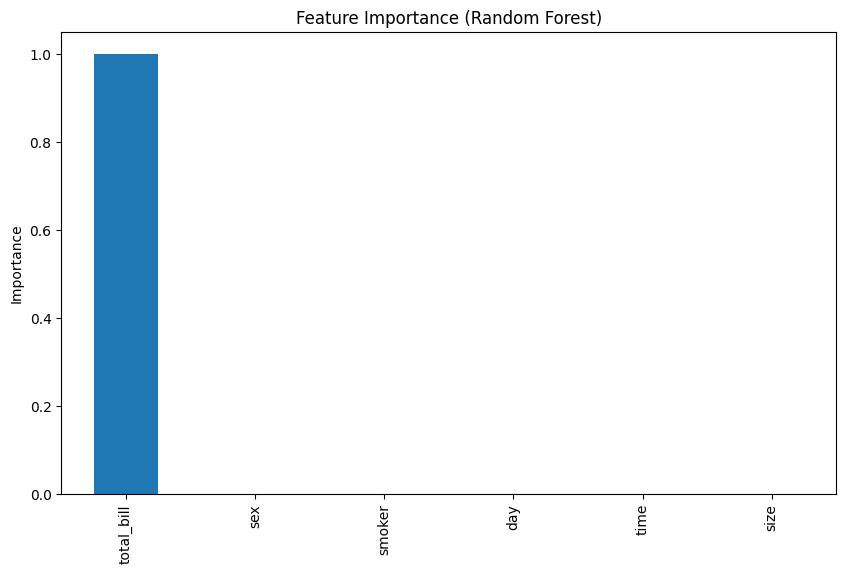

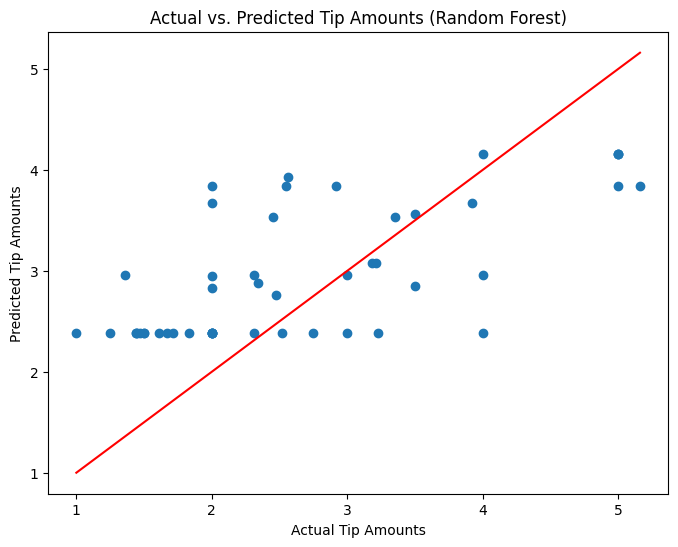

In [73]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42, n_estimators=100,max_depth=1,min_samples_leaf=6)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("\nRandom Forest Regression:")
print(f"  Mean Squared Error: {rf_mse:.2f}")
print(f"  R-squared: {rf_r2:.2f}")

# Feature Importance (Random Forest)
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
print("\nFeature Importance (Random Forest):")
print(feature_importance_rf)

#Further analysis and visualization for insights
#1. Feature importance plot for random forest
plt.figure(figsize=(10, 6))
feature_importance_rf.plot(kind='bar')
plt.title('Feature Importance (Random Forest)')
plt.ylabel('Importance')
plt.show()

#2. Actual vs. predicted values plot for random forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Tip Amounts')
plt.ylabel('Predicted Tip Amounts')
plt.title('Actual vs. Predicted Tip Amounts (Random Forest)')
plt.show()


Support Vector Regression:
  Mean Squared Error: 1.00
  R-squared: 0.20


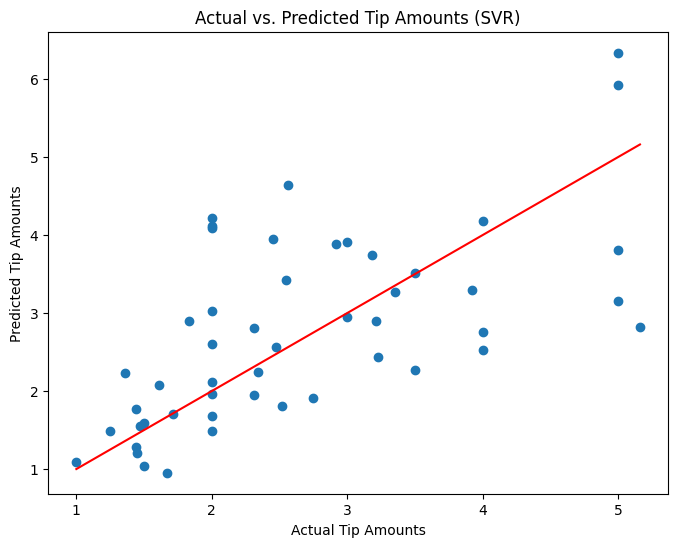

In [23]:
from sklearn.svm import SVR

# Support Vector Regression
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

print("\nSupport Vector Regression:")
print(f"  Mean Squared Error: {svr_mse:.2f}")
print(f"  R-squared: {svr_r2:.2f}")

#Further analysis and visualization for insights
#1. Actual vs. predicted values plot for SVR
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svr_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Tip Amounts')
plt.ylabel('Predicted Tip Amounts')
plt.title('Actual vs. Predicted Tip Amounts (SVR)')
plt.show()


K-Nearest Neighbors Regression:
  Mean Squared Error: 0.81
  R-squared: 0.35


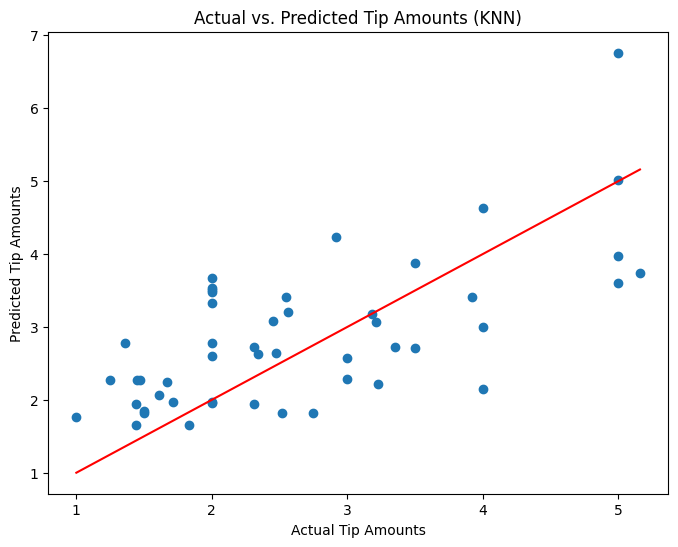

In [24]:
from sklearn.neighbors import KNeighborsRegressor

# KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

print("\nK-Nearest Neighbors Regression:")
print(f"  Mean Squared Error: {knn_mse:.2f}")
print(f"  R-squared: {knn_r2:.2f}")

#Further analysis and visualization for insights
#1. Actual vs. predicted values plot for KNN
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Tip Amounts')
plt.ylabel('Predicted Tip Amounts')
plt.title('Actual vs. Predicted Tip Amounts (KNN)')
plt.show()